# 🔍 YOLOv11 기반 이미지 검출 실습

🍎🍌 사과 & 바나나 객체 탐지 예제 데이터셋

Roboflow Universe에서 제공하는 fruits-apple-banana 데이터셋은 사과와 바나나를 포함한 1,000장의 이미지와 주석이 포함된 공개 데이터셋입니다.

📁 데이터셋 구성

- 이미지 수: 1,000장
- 클래스: 사과(apple), 바나나(banana)
- 형식: YOLOv8, COCO JSON 등 다양한 포맷으로 다운로드 가능
- 데이터 분할:
    - 훈련(Train): 76%
    - 검증(Validation): 18%
    - 테스트(Test): 6%

🔽 데이터셋 다운로드 및 사용 방법

1. Roboflow 계정 생성 및 로그인
    - Roboflow에 접속하여 무료 계정을 생성하고 로그인합니다.

2. 데이터셋 페이지로 이동
    - fruits-apple-banana 데이터셋 페이지로 이동합니다.

3. 데이터셋 다운로드
    - Download Dataset 버튼을 클릭합니다.

    - 원하는 포맷을 선택합니다:
        - YOLOv8
        - COCO JSON
        - Pascal VOC XML
        - TFRecord
        - 기타

    - Download 버튼을 클릭하여 ZIP 파일을 다운로드합니다.

4. 데이터셋 압축 해제
    - 다운로드한 ZIP 파일을 원하는 디렉토리에 압축 해제합니다.

5. YOLOv8 모델 학습
    - Ultralytics의 YOLOv8을 사용하여 모델을 학습할 수 있습니다.

In [1]:
# ✅ 필수 라이브러리 설치
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.5 MB/s eta 0:00:00


In [2]:
# 📦 YOLOv11 불러오기 및 예측 테스트 (사전 학습 모델)
from ultralytics import YOLO
model = YOLO("yolo11n.pt")
results = model('https://ultralytics.com/images/bus.jpg', show=True)
results

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 56.6ms
Speed: 14.4ms preprocess, 56.6ms inference, 294.5ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [3]:
!curl -L "https://universe.roboflow.com/ds/pyRSTdNF9w?key=9fmDB9Q8vC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   2421      0 --:--:-- --:--:-- --:--:--  2428
100 56.7M  100 56.7M    0     0  8862k      0  0:00:06  0:00:06 --:--:-- 11.6M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/rgb_115_png.rf.297664276a6dd9f5414ffe5199a09698.jpg  
 extracting: test/images/rgb_119_png.rf.23ee609e48a33a9ae846d80a4b9c5569.jpg  
 extracting: test/images/rgb_124_png.rf.a2965908db21b6ed3fc023d53cf099ef.jpg  
 extracting: test/images/rgb_125_png.rf.4d28bba6737e23af3ae3fb4722920cc1.jpg  
 extracting: test/images/rgb_127_png.rf.3852418d07f69db0c25be5cb0a396519.jpg  
 extracting: test/images/rgb_131_png.rf.c4023a79d583f1ac5a613b2d647b5398.jpg  
 extracting: test/images/rgb

## 🏋️ 전이 학습을 통한 사용자 정의 모델 학습

In [4]:
# 전이 학습 시작
model = YOLO("yolo11n.pt")
model.train(data='data.yaml', epochs=50, imgsz=640, batch=8, name='defect-detection')

Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=defect-detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,230 parameters, 2,590,214 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1378.0±631.5 MB/s, size: 44.5 KB)


train: Scanning /content/train/labels... 700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 700/700 [00:00<00:00, 1146.50it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 615.1±502.3 MB/s, size: 64.9 KB)


val: Scanning /content/valid/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 881.79it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/defect-detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/defect-detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.43G     0.7346      2.404     0.9654        292        640: 100%|██████████| 88/88 [00:29<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.54it/s]

                   all        200      13611      0.988      0.775      0.923      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.78G     0.6287     0.7672     0.9104        257        640: 100%|██████████| 88/88 [00:10<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.34it/s]

                   all        200      13611      0.954      0.951      0.962      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.12G     0.5713     0.5846     0.8908        197        640: 100%|██████████| 88/88 [00:10<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.80it/s]

                   all        200      13611      0.982      0.949      0.971      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.14G     0.5856      0.554     0.8827        635        640: 100%|██████████| 88/88 [00:10<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.68it/s]

                   all        200      13611      0.982      0.952      0.973      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.49G     0.5459     0.5127     0.8754        352        640: 100%|██████████| 88/88 [00:10<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.74it/s]

                   all        200      13611      0.985      0.957      0.977      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       3.5G     0.5366     0.4921     0.8703        304        640: 100%|██████████| 88/88 [00:10<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.69it/s]

                   all        200      13611      0.985      0.957      0.978        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.87G     0.5256     0.4731     0.8652        413        640: 100%|██████████| 88/88 [00:10<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.64it/s]

                   all        200      13611      0.987      0.959      0.977      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.89G     0.5047     0.4528     0.8616        467        640: 100%|██████████| 88/88 [00:10<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.58it/s]

                   all        200      13611      0.987      0.957      0.979      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       3.9G     0.4961     0.4449     0.8579        238        640: 100%|██████████| 88/88 [00:10<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.33it/s]

                   all        200      13611      0.986      0.961      0.978      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.92G     0.4917      0.434     0.8552        291        640: 100%|██████████| 88/88 [00:10<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.59it/s]

                   all        200      13611      0.988      0.958      0.978      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.93G     0.4778     0.4206     0.8546        276        640: 100%|██████████| 88/88 [00:10<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.40it/s]

                   all        200      13611      0.988       0.96       0.98      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.32G     0.4693     0.4052     0.8511        588        640: 100%|██████████| 88/88 [00:10<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.47it/s]

                   all        200      13611      0.987      0.961       0.98       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.34G     0.4681     0.4018     0.8524        450        640: 100%|██████████| 88/88 [00:10<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.77it/s]

                   all        200      13611      0.989      0.957       0.98      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.35G      0.464     0.3941     0.8522        463        640: 100%|██████████| 88/88 [00:10<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.74it/s]

                   all        200      13611      0.989      0.962       0.98      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.37G     0.4633     0.3887     0.8485        289        640: 100%|██████████| 88/88 [00:10<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.84it/s]

                   all        200      13611      0.989       0.96       0.98      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.38G     0.4563     0.3866     0.8487        234        640: 100%|██████████| 88/88 [00:10<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.89it/s]

                   all        200      13611      0.987      0.963       0.98      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       4.4G     0.4619     0.3831     0.8491        443        640: 100%|██████████| 88/88 [00:10<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.74it/s]

                   all        200      13611      0.987       0.96       0.98      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.41G     0.4493     0.3756     0.8466        343        640: 100%|██████████| 88/88 [00:10<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.00it/s]

                   all        200      13611      0.987      0.963       0.98       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.43G      0.448     0.3704     0.8459        272        640: 100%|██████████| 88/88 [00:10<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.83it/s]

                   all        200      13611      0.988      0.963       0.98      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.44G     0.4532     0.3682     0.8454        189        640: 100%|██████████| 88/88 [00:10<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.71it/s]

                   all        200      13611      0.989      0.965      0.981      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.46G     0.4413       0.36     0.8409        320        640: 100%|██████████| 88/88 [00:10<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.72it/s]

                   all        200      13611      0.989      0.966      0.981      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.47G      0.433     0.3537     0.8415        306        640: 100%|██████████| 88/88 [00:10<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.84it/s]

                   all        200      13611      0.989      0.963      0.981      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.49G     0.4367     0.3552     0.8403        414        640: 100%|██████████| 88/88 [00:10<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.83it/s]

                   all        200      13611      0.988      0.963      0.981      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       4.5G     0.4384     0.3518     0.8406        307        640: 100%|██████████| 88/88 [00:10<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.93it/s]

                   all        200      13611      0.989      0.966      0.981       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.52G     0.4383     0.3506     0.8404        367        640: 100%|██████████| 88/88 [00:10<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.02it/s]

                   all        200      13611      0.989      0.965      0.981      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.53G     0.4275     0.3427     0.8381        372        640: 100%|██████████| 88/88 [00:10<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.05it/s]

                   all        200      13611       0.99      0.966      0.981      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.54G     0.4292     0.3453     0.8395        242        640: 100%|██████████| 88/88 [00:10<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.85it/s]

                   all        200      13611      0.986      0.964      0.981       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.56G     0.4205     0.3391     0.8378        436        640: 100%|██████████| 88/88 [00:10<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.93it/s]

                   all        200      13611       0.99      0.964      0.981      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.57G     0.4164      0.336     0.8392        288        640: 100%|██████████| 88/88 [00:10<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.83it/s]

                   all        200      13611       0.99      0.966      0.981      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.01G     0.4315     0.3401     0.8377        415        640: 100%|██████████| 88/88 [00:11<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.83it/s]

                   all        200      13611      0.989      0.966      0.981      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.02G     0.4243      0.335     0.8356        258        640: 100%|██████████| 88/88 [00:10<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.76it/s]

                   all        200      13611       0.99      0.966      0.981       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.04G     0.4166     0.3292     0.8371        276        640: 100%|██████████| 88/88 [00:10<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.73it/s]

                   all        200      13611      0.991      0.965      0.981      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.05G     0.4236     0.3319     0.8375        337        640: 100%|██████████| 88/88 [00:10<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.92it/s]

                   all        200      13611      0.989      0.967      0.981      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.07G     0.4109     0.3223      0.834        434        640: 100%|██████████| 88/88 [00:10<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.96it/s]

                   all        200      13611      0.989      0.968      0.981      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.08G     0.4153     0.3228     0.8338        842        640: 100%|██████████| 88/88 [00:10<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.07it/s]

                   all        200      13611       0.99      0.968      0.982      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.09G     0.4114      0.321     0.8356        579        640: 100%|██████████| 88/88 [00:10<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.10it/s]

                   all        200      13611      0.989      0.969      0.981      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.11G     0.4083     0.3191     0.8348        420        640: 100%|██████████| 88/88 [00:10<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.89it/s]

                   all        200      13611      0.988      0.967      0.981      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.12G     0.4048     0.3149     0.8321        229        640: 100%|██████████| 88/88 [00:10<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.93it/s]

                   all        200      13611       0.99      0.967      0.982       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.14G     0.4066     0.3142     0.8315        296        640: 100%|██████████| 88/88 [00:10<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.89it/s]

                   all        200      13611      0.988       0.97      0.982      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.15G     0.3978     0.3128     0.8321        375        640: 100%|██████████| 88/88 [00:10<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.11it/s]

                   all        200      13611      0.992      0.967      0.982      0.941


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.17G      0.371     0.3028      0.822        216        640: 100%|██████████| 88/88 [00:10<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.77it/s]

                   all        200      13611      0.991      0.968      0.981      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.18G     0.3582      0.291     0.8188        238        640: 100%|██████████| 88/88 [00:09<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.84it/s]

                   all        200      13611      0.991      0.968      0.982      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       5.2G     0.3609     0.2893     0.8198        224        640: 100%|██████████| 88/88 [00:09<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.95it/s]

                   all        200      13611      0.991      0.968      0.982       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.21G     0.3584     0.2853     0.8184        156        640: 100%|██████████| 88/88 [00:09<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.92it/s]

                   all        200      13611      0.992      0.968      0.982       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.23G     0.3539     0.2819     0.8175        151        640: 100%|██████████| 88/88 [00:09<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.87it/s]

                   all        200      13611       0.99       0.97      0.982      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.24G      0.356     0.2813     0.8188        241        640: 100%|██████████| 88/88 [00:09<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.82it/s]

                   all        200      13611      0.991      0.969      0.982      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.26G     0.3568     0.2803     0.8173        285        640: 100%|██████████| 88/88 [00:09<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.89it/s]

                   all        200      13611      0.988      0.971      0.982      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.27G     0.3444     0.2737      0.817        221        640: 100%|██████████| 88/88 [00:09<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.97it/s]

                   all        200      13611      0.989      0.971      0.982      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.29G     0.3396     0.2698     0.8159        264        640: 100%|██████████| 88/88 [00:09<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.91it/s]

                   all        200      13611      0.991      0.971      0.982      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       5.3G     0.3356     0.2671      0.814        229        640: 100%|██████████| 88/88 [00:09<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.99it/s]

                   all        200      13611       0.99      0.971      0.982      0.944



50 epochs completed in 0.182 hours.
Optimizer stripped from runs/detect/defect-detection/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/defect-detection/weights/best.pt, 5.5MB

Validating runs/detect/defect-detection/weights/best.pt...
Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▌        | 2/13 [00:00<00:01,  5.69it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.04it/s]


                   all        200      13611       0.99      0.938      0.955      0.917
        ycb_011_banana        200       6999      0.982      0.931      0.949      0.896
         ycb_013_apple        200       6612      0.998      0.944      0.961      0.938
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 33.5ms postprocess per image
Results saved to runs/detect/defect-detection


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d9e73934620>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## 🔎 학습된 모델로 테스트

In [5]:
# 모델 불러오기 및 예측
model = YOLO('/content/runs/detect/defect-detection/weights/best.pt')
results = model('/content/test/images/rgb_115_png.rf.297664276a6dd9f5414ffe5199a09698.jpg', save=True, show=True)
results


image 1/1 /content/test/images/rgb_115_png.rf.297664276a6dd9f5414ffe5199a09698.jpg: 640x640 25 ycb_011_bananas, 12 ycb_013_apples, 10.8ms
Speed: 5.8ms preprocess, 10.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'ycb_011_banana', 1: 'ycb_013_apple'}
 obb: None
 orig_img: array([[[207, 247, 245],
         [216, 253, 251],
         [226, 255, 255],
         ...,
         [225, 250, 254],
         [223, 251, 252],
         [222, 250, 251]],
 
        [[207, 247, 245],
         [216, 253, 251],
         [226, 255, 255],
         ...,
         [217, 252, 255],
         [216, 254, 255],
         [216, 254, 255]],
 
        [[207, 247, 245],
         [216, 253, 251],
         [226, 255, 255],
         ...,
         [199, 252, 255],
         [197, 252, 255],
         [196, 253, 255]],
 
        ...,
 
        [[ 82,  98, 105],
         [ 82,  98, 105],
         [ 83,  99, 106],
         ...,
         [ 65, 255, 250],
         [ 65, 255, 252],
         [ 67, 255, 252]],
 
        [[ 82,  98, 105],
         [ 82,  98, 105],
         [ 83,  99, 106],
    

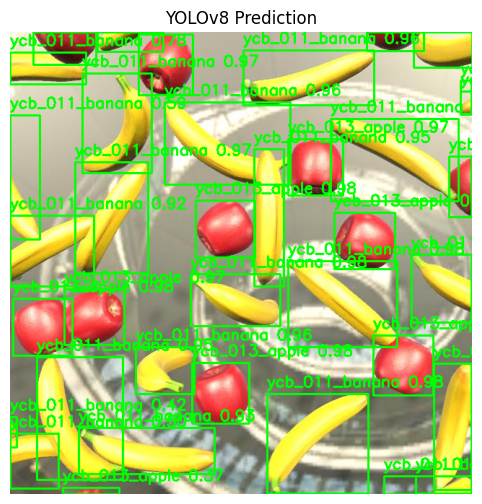

In [6]:
import cv2
import matplotlib.pyplot as plt

# 이미지 불러오기
img_path = "/content/test/images/rgb_115_png.rf.297664276a6dd9f5414ffe5199a09698.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 결과 정보 얻기
boxes = results[0].boxes
annotated = img_rgb.copy()

# 시각화 (Matplotlib 사용)
for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    label = model.names[cls_id]

    # 박스 그리기
    cv2.rectangle(annotated, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # 라벨 그리기
    text = f"{label} {conf:.2f}"
    cv2.putText(annotated, text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# 6. 출력
plt.figure(figsize=(10, 6))
plt.imshow(annotated)
plt.axis("off")
plt.title("YOLOv8 Prediction")
plt.show()

In [ ]:
file_id = "18Mix-ApDzdSeFFR8UID9_Jyg_Zdd0JDb"
local_path = gdown.download(id=file_id, output="downloaded.bin", quiet=False)